In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl
%matplotlib inline

In [89]:
df=pd.read_csv("/home/deepanshu/Documents/StudentsPerformance.csv")
print(df.shape)
df.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [90]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [91]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [92]:
df.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

Target looks like regression


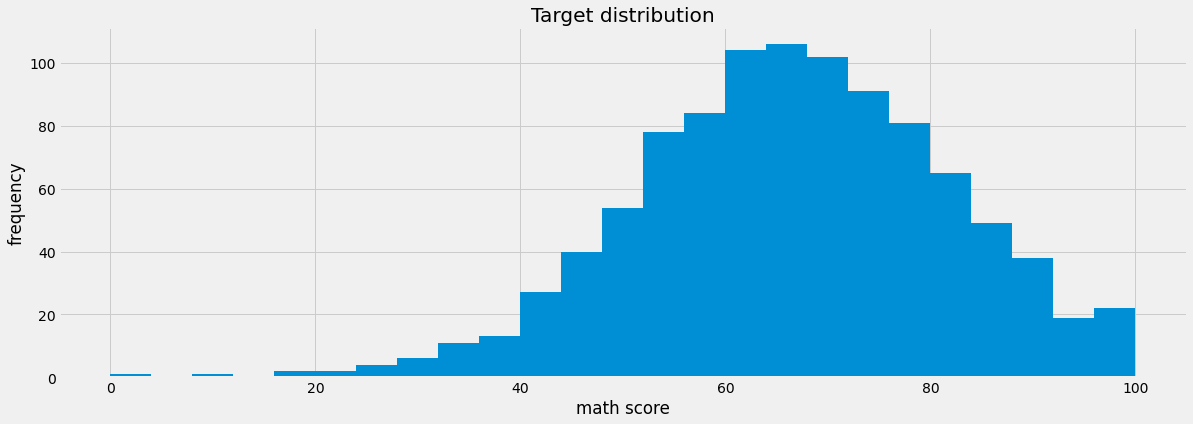

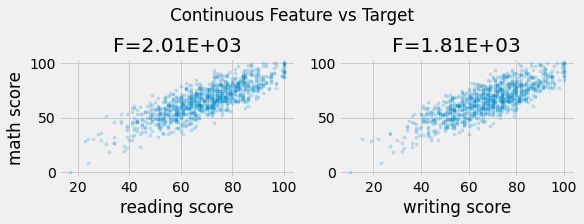

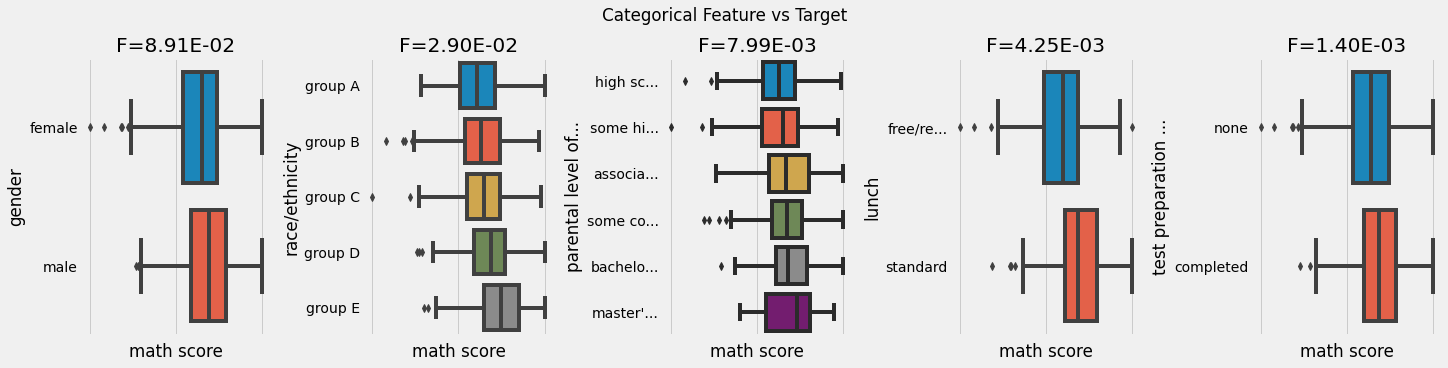

In [93]:
plt.rcParams['figure.figsize']=(18,6)
plt.style.use('fivethirtyeight')
dabl.plot(df,target_col='math score')

Target looks like regression


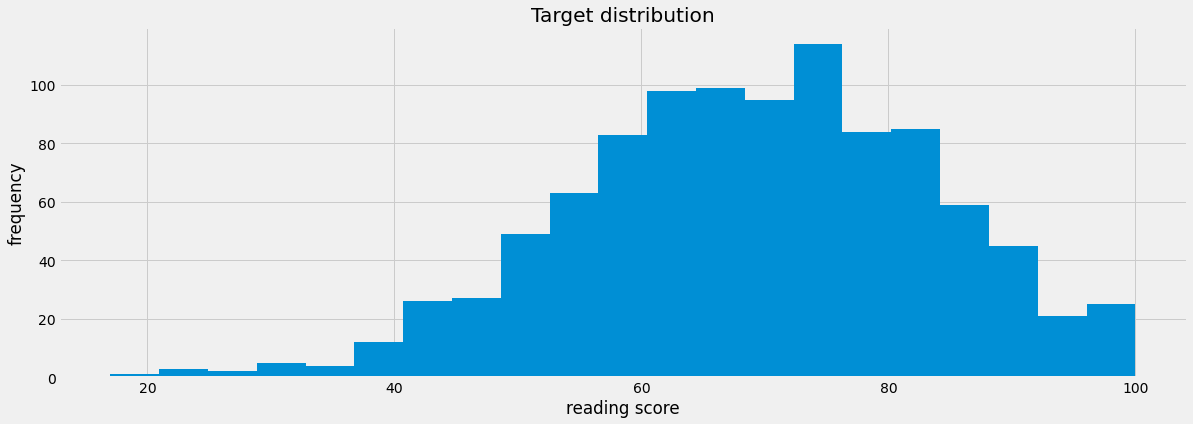

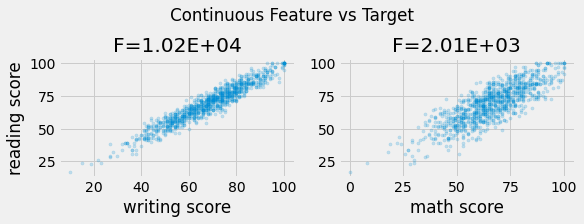

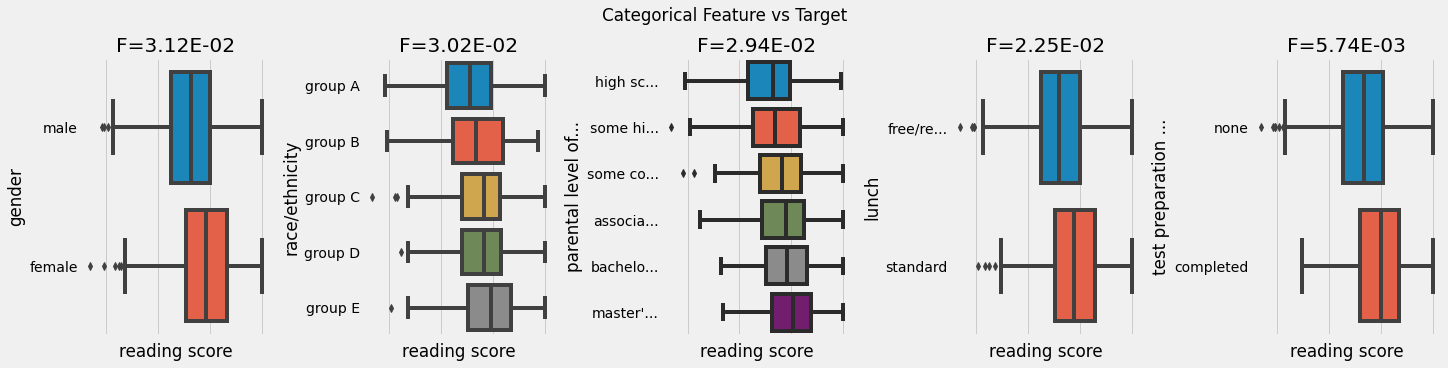

In [94]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(df, target_col = 'reading score')

In [95]:
df[['lunch','gender','math score','writing score',
      'reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

In [96]:
df[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female          67             79             78
                        male            73             70             71
none                    female          62             70             71
                        male            67             60             63

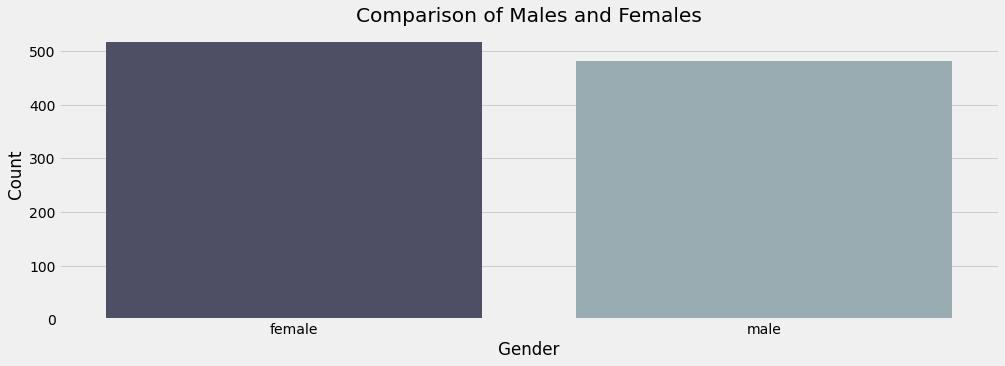

In [97]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(df['gender'], palette = 'bone')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

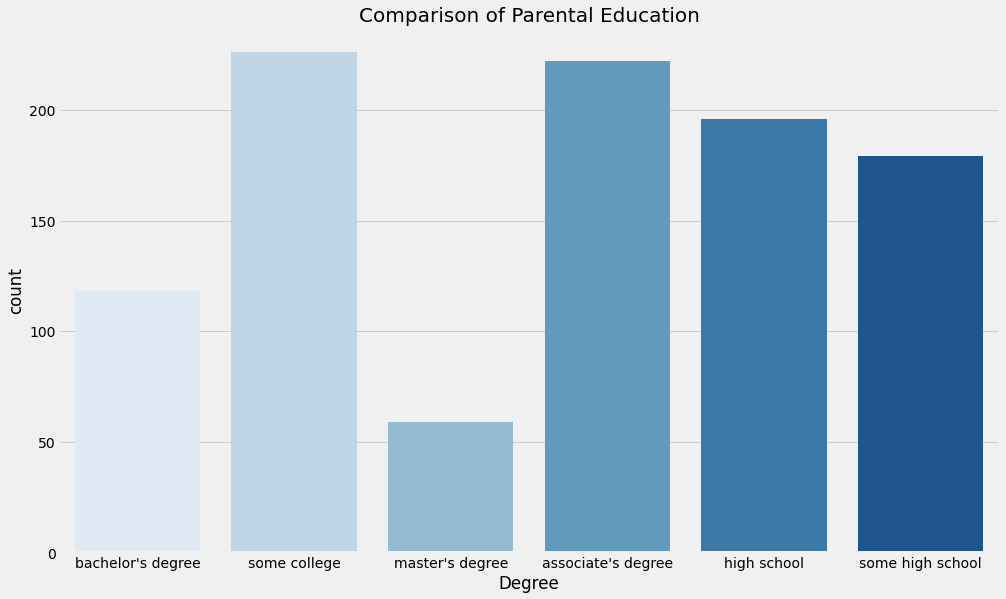

In [98]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

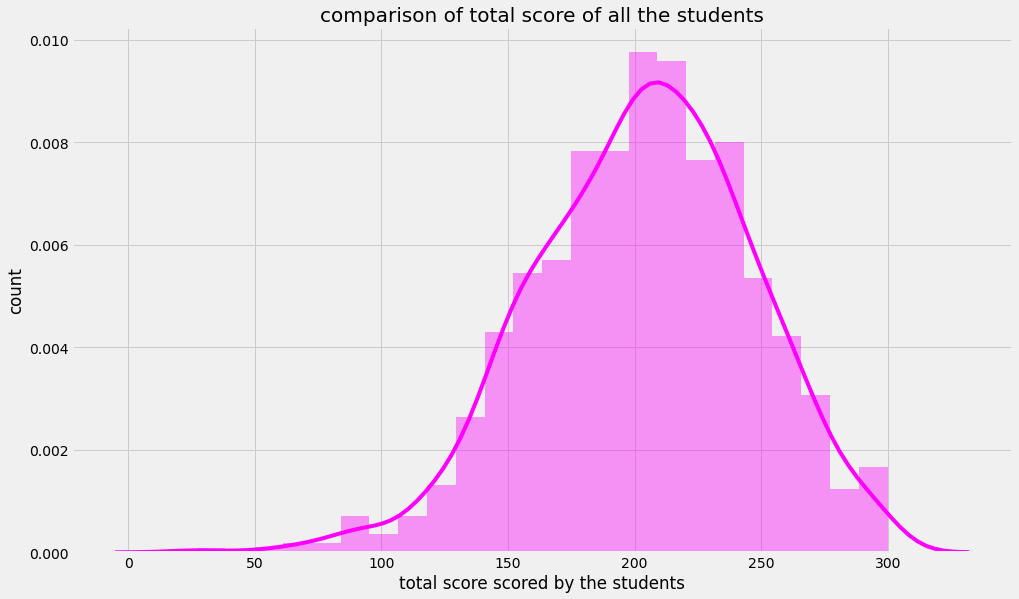

In [99]:
import warnings
warnings.filterwarnings('ignore')

df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

sns.distplot(df['total_score'], color = 'magenta')

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')

plt.show()

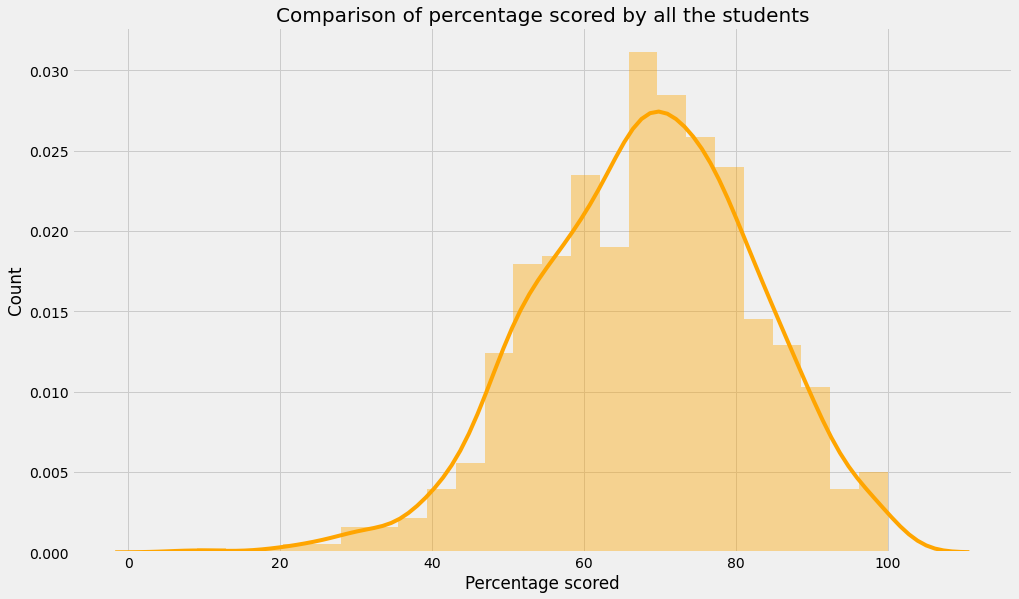

In [100]:
from math import * 
import warnings
warnings.filterwarnings('ignore')

df['percentage'] = df['total_score']/3

for i in range(0, 1000):
    df['percentage'][i] = ceil(df['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(df['percentage'], color = 'orange')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()

In [101]:
def getgrade(cols):
    percentage=cols[0]

    if(percentage >= 90):
        return 'O'
    if(percentage >= 80):
        return 'A'
    if(percentage >= 70):
        return 'B'
    if(percentage >= 60):
        return 'C'
    if(percentage >= 40):
        return 'D'
    else :
        return 'E'



df['grades'] = df[['percentage']].apply(getgrade,axis=1)
df['grades'].value_counts()

B    260
C    252
D    248
A    156
O     58
E     26
Name: grades, dtype: int64

In [102]:
df.head

<bound method NDFrame.head of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none     

In [103]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total_score', 'percentage', 'grades'],
      dtype='object')


In [104]:
df['gender'] = le.fit_transform(df['gender'])
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])
df['parental level of education']=le.fit_transform(df['parental level of education'])
df['lunch']=le.fit_transform(df['lunch'])
df['test preparation course']=le.fit_transform(df['test preparation course'])

In [105]:
df['grades']=le.fit_transform(df['grades'])
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,percentage,grades
0,0,1,1,1,1,72,72,74,218,73.0,1
1,0,2,4,1,0,69,90,88,247,83.0,0
2,0,1,3,1,1,90,95,93,278,93.0,5
3,1,0,0,0,1,47,57,44,148,50.0,3
4,1,2,4,1,1,76,78,75,229,77.0,1
...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95,282,94.0,5
996,1,2,2,0,1,62,55,55,172,58.0,3
997,0,2,2,0,0,59,71,65,195,65.0,2
998,0,3,4,1,0,68,78,77,223,75.0,1


In [106]:
x = df.iloc[:,:14]
y = df.iloc[:,10]

print(x.shape)
print(y.shape)

(1000, 11)
(1000,)


In [107]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 11)
(750,)
(250, 11)
(250,)


In [108]:
# importing the MinMaxScaler
from sklearn.preprocessing import StandardScaler

# creating a scaler
mm = StandardScaler()

# feeding the independent variable into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [109]:
from sklearn.decomposition import PCA

# creating a principal component analysis model
pca = PCA(n_components = None)

# feeding the independent variables to the PCA model
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# visualising the principal components that will explain the highest share of variance
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

# creating a principal component analysis model
pca = PCA(n_components = 2)

# feeding the independent variables to the PCA model
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

[4.70953820e-01 1.05952879e-01 9.30819683e-02 9.07412853e-02
 8.71429139e-02 7.74295730e-02 6.41194053e-02 7.06575627e-03
 3.48643251e-03 2.59669235e-05 1.96698195e-33]


In [110]:
from sklearn.linear_model import  LogisticRegression

# creating a model
model = LogisticRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.916
Testing Accuracy : 0.88


[[28  2  0  0  0  2]
 [ 3 63  6  0  0  0]
 [ 0  1 53  4  0  0]
 [ 0  0  3 68  0  0]
 [ 0  0  0  1  5  0]
 [ 8  0  0  0  0  3]]


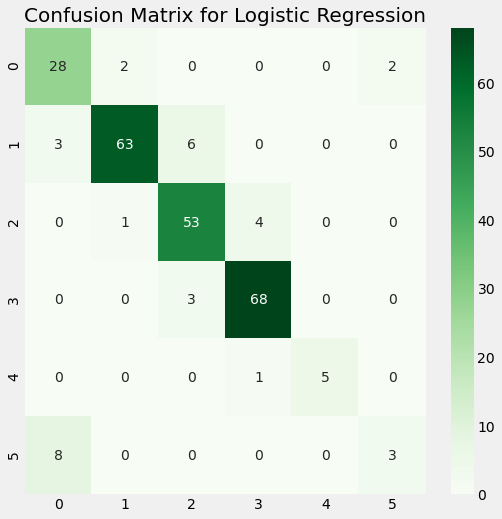

In [111]:
from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Greens')
plt.title('Confusion Matrix for Logistic Regression', fontweight = 30, fontsize = 20)
plt.show()

In [112]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.924
Testing Accuracy : 0.888


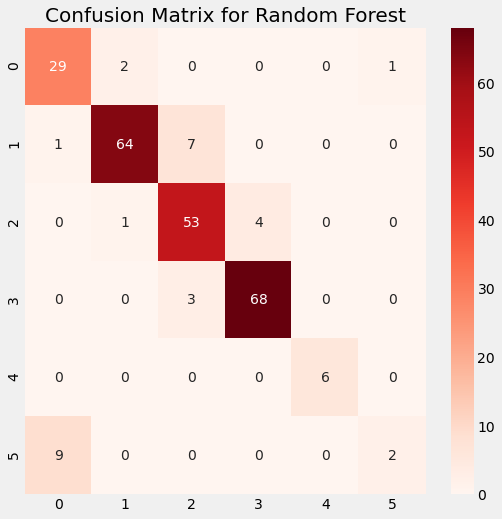

In [114]:
from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.title('Confusion Matrix for Random Forest', fontweight = 30, fontsize = 20)
plt.show()

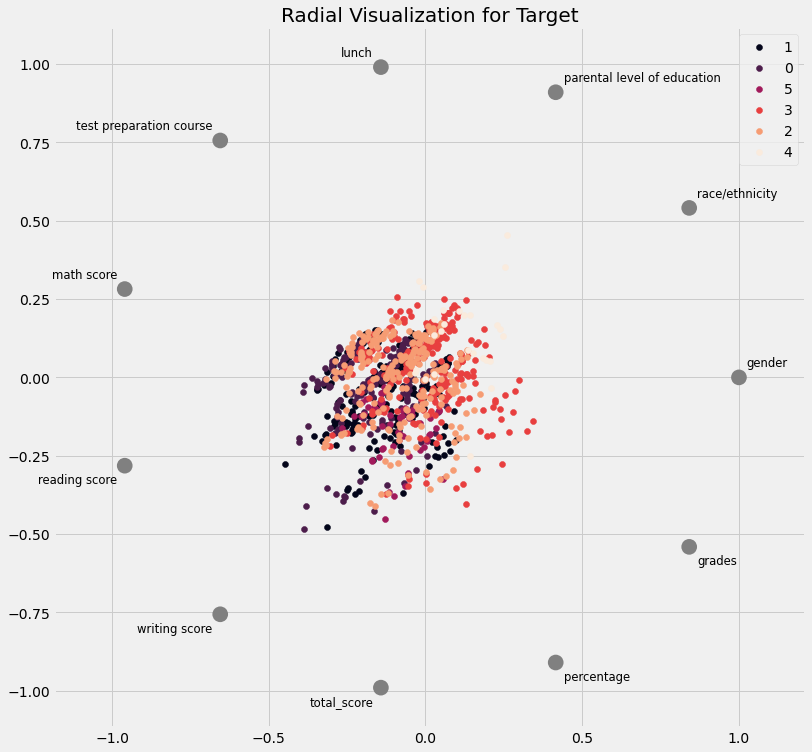

In [115]:
from pandas.plotting import radviz
fig, ax = plt.subplots(figsize=(12, 12))
new_df = x.copy()
new_df["status"] = y
radviz(new_df, "status", ax=ax, colormap="rocket")
plt.title('Radial Visualization for Target', fontsize = 20)
plt.show()